In [24]:
import numpy as np

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan import Observer, FixedTarget

from astroplan import download_IERS_A

download_IERS_A()

from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination

%matplotlib inline
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range

from astroplan.plots import plot_sky, plot_airmass

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from astroplan import AltitudeConstraint, AirmassConstraint, AtNightConstraint
from astroplan import observability_table
from astroplan import moon_illumination
from astroplan import MoonSeparationConstraint

In [60]:
CTIO = Observer.at_site('Cerro Tololo Interamerican Observatory')
my_date1 = Time("2019-03-1")
my_date2 = Time("2019-03-15")
target_data = pd.read_csv('/astro/users/chrism99/Desktop/LJ/QuasarsFinal.csv')
#target_data

In [61]:
current_time = Time.now()    # Current UTC Time
reference_time = current_time

astro_set = CTIO.twilight_evening_astronomical(my_date1, which='nearest')
astro_rise = CTIO.twilight_morning_astronomical(my_date2, which='next')

local_now = current_time.to_datetime(CTIO.timezone)
sunset_CTIO = CTIO.sun_set_time(current_time, which='nearest')
midnight_CTIO = CTIO.midnight(current_time, which='next')

In [62]:
observing_length = (astro_rise - astro_set).to(u.h)

In [63]:
coords = SkyCoord(target_data['ra         '], target_data['dec        '],  unit = (u.hourangle , u.deg), frame='icrs')  #('Right Ascension', 'Declination', frame='icrs')
targets = [FixedTarget(coord = SkyCoord(ra = RA, dec = DEC, unit = (u.hourangle , u.deg)),name = Name) for Name, RA, DEC in zip(target_data['name             '], target_data['ra         '], target_data['dec        '])]
#targets

In [65]:
CTIO.target_is_up(midnight_CTIO, targets)  #is the object visable? (midnight_CTIO, object)
constraints = [AirmassConstraint(max=1.8), MoonSeparationConstraint(min = 90 * u.deg), AtNightConstraint.twilight_astronomical()]
observing_table = observability_table(constraints, CTIO, targets, time_range=observing_range)

print(observing_table[:50])

   target name    ever observable always observable fraction of time observable
----------------- --------------- ----------------- ---------------------------
084_4515                    False             False                         0.0
084_6809                    False             False                         0.0
1.4418.1930                  True             False         0.02027027027027027
13.5717.178                  True             False         0.02837837837837838
13.6805.324                  True             False         0.02972972972972973
13.6808.521                  True             False         0.02972972972972973
133_2106                    False             False                         0.0
14A1                         True             False         0.21216216216216216
14A2                         True             False         0.21216216216216216
152_6235                    False             False                         0.0
              ...             ...       

In [53]:
#where_to_look = CTIO.altaz(midnight_CTIO, targets)  #find object (mignight_CTIO, object)

In [54]:
altaz_my_target = CTIO.altaz(midnight_CTIO, targets)
print (altaz_my_target.alt, altaz_my_target.az) 
print (altaz_my_target.secz)  #airmass <2

['6d39m00.4307s' '6d38m45.3561s' '16d57m01.5618s' '18d50m12.2999s'
 '19d22m23.1616s' '19d13m54.6109s' '6d45m33.3626s' '56d37m28.2607s'
 '56d37m42.9946s' '6d48m24.1513s' '6d48m29.0732s' '27d02m52.1652s'
 '-7d59m46.3681s' '16d39m38.5003s' '16d57m55.7167s' '6d52m56.2478s'
 '-69d58m16.3815s' '-50d57m08.697s' '-66d32m10.589s' '-46d54m16.0552s'
 '-34d52m20.3173s' '-35d19m44.735s' '-34d54m24.1378s' '-39d33m17.288s'
 '-29d02m51.914s' '-2d13m45.1138s' '24d01m51.4103s' '-0d51m54.4472s'
 '25d43m20.5489s' '42d44m12.7239s' '50d11m20.7084s' '32d33m15.2378s'
 '23d57m58.128s' '32d18m24.7531s' '59d16m43.8566s' '70d30m59.739s'
 '8d29m25.6626s' '68d50m28.7191s' '68d36m43.742s' '35d13m17.8301s'
 '31d38m31.0927s' '5d59m07.6735s' '9d01m37.6507s' '18d20m20.1477s'
 '-8d50m59.7167s' '35d51m43.2323s' '8d25m54.9505s' '-0d22m10.4746s'
 '13d57m07.4594s' '-16d48m58.4284s'] ['8d07m56.5058s' '8d08m15.2692s' '198d11m22.9738s' '196d58m30.0166s'
 '197d15m25.5503s' '197d27m07.3938s' '8d03m26.0254s' '338d18m04.97s'
 '338d

/astro/classes/Astro_300/miniconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The frac parameter was deprecated in version 2.1. Use tick padding via Axes.tick_params instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


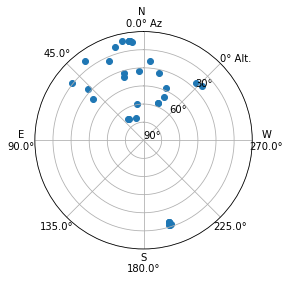

In [55]:
plot_sky(targets, CTIO, midnight_CTIO);

ValueError: Time and Target arguments cannot be broadcast against each other with shapes (740,) and (50,)

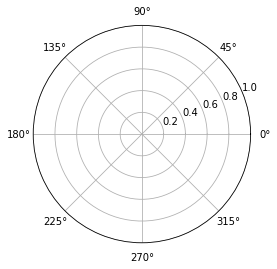

In [56]:
start_time = astro_set
end_time = astro_rise

observing_range = [astro_set, astro_rise]

time_grid = time_grid_from_range(observing_range)

plot_sky(targets, CTIO, time_grid);

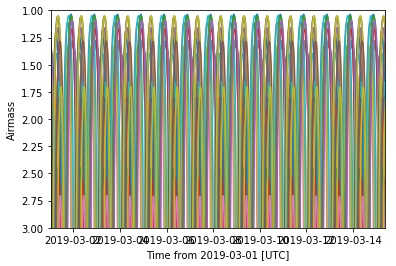

In [16]:
plot_airmass(targets, CTIO, time_grid);

NameError: name 'pd' is not defined